### Analysis of Programming Langagues in Poland

In [291]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

### Data Preprocessing

In [292]:
tags = pd.read_excel('Poland_tags.xlsx')
mapping = pd.read_excel("clean_mapping_pl.xlsx")
tags.columns
tags.drop('Unnamed: 0', axis=1, inplace=True)
tags.columns

Index(['NUTS3CODE', 'Year', 'questioncount', 'answercount',
       'dpythonanswercount', 'dpythonquestioncount', 'dCplusplusanswercount',
       'dCplusplusquestioncount', 'dCanswercount', 'dCquestioncount',
       'dJavaanswercount', 'dJavaquestioncount', 'dRanswercount',
       'dRquestioncount', 'dRubyanswercount', 'dRubyquestioncount',
       'dJavascriptanswercount', 'dJavascriptquestioncount', 'dPHPanswercount',
       'dPHPquestioncount', 'dC_sharpanswercount', 'dC_sharpquestioncount',
       'ddpythonanswercount', 'ddpythonquestioncount',
       'ddCplusplusanswercount', 'ddCplusplusquestioncount', 'ddCanswercount',
       'ddCquestioncount', 'ddJavaanswercount', 'ddJavaquestioncount',
       'ddRanswercount', 'ddRquestioncount', 'ddRubyanswercount',
       'ddRubyquestioncount', 'ddJavascriptanswercount',
       'ddJavascriptquestioncount', 'ddPHPanswercount', 'ddPHPquestioncount',
       'ddC_sharpanswercount', 'ddC_sharpquestioncount'],
      dtype='object')

In [293]:
mapping

Unnamed: 0                                NUTS1 NUTS1 CODE  \
0            0                 MAKROREGION PÓŁNOCNY        PL6   
1            1                 MAKROREGION WSCHODNI        PL8   
2            2                 MAKROREGION PÓŁNOCNY        PL6   
3            3               MAKROREGION POŁUDNIOWY        PL2   
4            4                MAKROREGION CENTRALNY        PL7   
..         ...                                  ...        ...   
67          67        MAKROREGION PÓŁNOCNO-ZACHODNI        PL4   
68          68                 MAKROREGION PÓŁNOCNY        PL6   
69          69        MAKROREGION PÓŁNOCNO-ZACHODNI        PL4   
70          70  MAKROREGION WOJEWÓDZTWO MAZOWIECKIE        PL9   
71          71      MAKROREGION POŁUDNIOWO-ZACHODNI        PL5   

                          NUTS2 NUTS2 CODE                      NUTS3  \
0     REGION KUJAWSKO-POMORSKIE       PL61       PODREGION WROCŁAWSKI   
1              REGION PODLASKIE       PL84         PODREGION SUWALSKI   
2    REGION WARMIŃSKO-MAZURSKIE       PL62        PODREGION OLSZYŃSKI   
3                REGION ŚLĄSKIE       PL22      PODREGION SOSNOWIECKI   
4                REGION ŁÓDZKIE       PL71      PODREGION PIOTRKOWSKI   
..                          ...        ...                        ...   
67         REGION WIELKOPOLSKIE       PL41    PODREGION MIASTO POZNAŃ   
68    REGION KUJAWSKO-POMORSKIE       PL61          PODREGION ŚWIECKI   
69    REGION ZACHODNIOPOMORSKIE       PL42  PODREGION MIASTO SZCZECIN   
70  REGION WARSZAWSKI STOŁECZNY       PL91  PODREGION MIASTO WARSZAWA   
71          REGION DOLNOŚLĄSKIE       PL51   PODREGION MIASTO WROCŁAW   

   NUTS3 CODE  
0       PL619  
1       PL843  
2       PL622  
3       PL22B  
4       PL713  
..        ...  
67      PL415  
68      PL618  
69      PL424  
70      PL911  
71      PL514  

[72 rows x 7 columns]

In [294]:
# Merge it with the 'tags' dataset
merged_tags = pd.merge(tags, mapping, left_on='NUTS3CODE', right_on = 'NUTS3 CODE', how='left')
merged_tags = merged_tags.drop(['NUTS1', 'NUTS1 CODE','NUTS2','NUTS2 CODE', 'Unnamed: 0'], axis=1)
merged_tags

NUTS3CODE  Year  questioncount  answercount  dpythonanswercount  \
0       PL214  2008             26          108                   1   
1       PL214  2009             74          218                   3   
2       PL214  2010            203          466                   3   
3       PL214  2011            715          830                  14   
4       PL214  2012            825         1062                  10   
..        ...   ...            ...          ...                 ...   
976     PL926  2017            306          205                   2   
977     PL926  2018            220           98                   2   
978     PL926  2019            246          452                  38   
979     PL926  2020            279          226                  11   
980     PL926  2021             98           63                   8   

     dpythonquestioncount  dCplusplusanswercount  dCplusplusquestioncount  \
0                       0                      8                        2   
1                       0                     10                        5   
2                       1                      4                        6   
3                       6                     10                        6   
4                       8                      6                       17   
..                    ...                    ...                      ...   
976                     5                      7                        5   
977                     4                      0                        2   
978                    13                      0                        3   
979                     1                      5                        8   
980                     3                      0                        2   

     dCanswercount  dCquestioncount  ...  ddRubyanswercount  \
0                1                1  ...                  0   
1                3                0  ...                  3   
2                2                2  ...                  5   
3                2                2  ...                 15   
4                3                1  ...                  6   
..             ...              ...  ...                ...   
976              2                1  ...                  2   
977              1                1  ...                  0   
978              0                1  ...                  0   
979              1                2  ...                  0   
980              0                0  ...                  1   

     ddRubyquestioncount  ddJavascriptanswercount  ddJavascriptquestioncount  \
0                      0                        1                          1   
1                      0                        1                          0   
2                      0                        6                          3   
3                      3                       12                         28   
4                      2                       29                         13   
..                   ...                      ...                        ...   
976                    0                        6                          7   
977                    0                        4                          6   
978                    0                       37                          9   
979                    0                       14                         16   
980                    0                        1                          9   

     ddPHPanswercount  ddPHPquestioncount  ddC_sharpanswercount  \
0                   7                   0                     1   
1                   2                   2                     3   
2                  11                   1                    12   
3                  48                  54                    35   
4                  55                  27                    81   
..                ...                 ...                   ...   
976                 3                  

In [295]:
merged_tags['activity'] = ((merged_tags['questioncount'] + 
                          merged_tags['answercount']) / 2)

In [296]:
languages = {
    'python': ['dpythonquestioncount', 'dpythonanswercount', 'ddpythonquestioncount', 'ddpythonanswercount'],
    'Cplusplus': ['dCplusplusquestioncount', 'dCplusplusanswercount', 'ddCplusplusquestioncount', 'ddCplusplusanswercount'],
    'C': ['dCquestioncount', 'dCanswercount', 'ddCquestioncount', 'ddCanswercount'],
    'Java': ['dJavaquestioncount', 'dJavaanswercount', 'ddJavaquestioncount', 'ddJavaanswercount'],
    'R': ['dRquestioncount', 'dRanswercount', 'ddRquestioncount', 'ddRanswercount'],
    'Ruby': ['dRubyquestioncount', 'dRubyanswercount', 'ddRubyquestioncount', 'ddRubyanswercount'],
    'Javascript': ['dJavascriptquestioncount', 'dJavascriptanswercount', 'ddJavascriptquestioncount', 'ddJavascriptanswercount'],
    'PHP': ['dPHPquestioncount', 'dPHPanswercount', 'ddPHPquestioncount', 'ddPHPanswercount'],
    'C_sharp': ['dC_sharpquestioncount', 'dC_sharpanswercount', 'ddC_sharpquestioncount', 'ddC_sharpanswercount']
}


# Iterate over the dictionary to calculate total activity for each language
for lang, columns in languages.items():
    merged_tags[f'{lang}_total_activity'] = merged_tags[columns].sum(axis=1)

# Display the DataFrame to verify the changes
merged_tags[['NUTS3CODE', 'Year'] + [f'{lang}_total_activity' for lang in languages]]

NUTS3CODE  Year  python_total_activity  Cplusplus_total_activity  \
0       PL214  2008                      2                        20   
1       PL214  2009                      6                        30   
2       PL214  2010                      8                        17   
3       PL214  2011                     33                        32   
4       PL214  2012                     33                        43   
..        ...   ...                    ...                       ...   
976     PL926  2017                     13                        23   
977     PL926  2018                     10                         4   
978     PL926  2019                     85                         6   
979     PL926  2020                     21                        24   
980     PL926  2021                     22                         4   

     C_total_activity  Java_total_activity  R_total_activity  \
0                   4                    4                 0   
1                   6                   21                 0   
2                   8                   61                 0   
3                   8                  141                 0   
4                   8                  209                 2   
..                ...                  ...               ...   
976                 6                   55                 2   
977                 4                   32                 0   
978                 2                   68                 0   
979                 6                   59                 4   
980                 0                   10                 4   

     Ruby_total_activity  Javascript_total_activity  PHP_total_activity  \
0                      0                          4                  15   
1                      9                          2                   9   
2                     17                         18                  26   
3                     69                         81                 206   
4                     49                         84                 172   
..                   ...                        ...                 ...   
976                   11                         26                  28   
977                    4                         20                  24   
978                    0                         93                   4   
979                    1                         61                   9   
980                    3                         20                   2   

     C_sharp_total_activity  
0                         7  
1                        14  
2                        67  
3                       136  
4                       243  
..                      ...  
976                      17  
977                      22  
978                      18  
979                      10  
980                       2  

[981 rows x 11 columns]

In [297]:
# Define the weights for questions and answers
weights = {'questions': 0.5, 'answers': 0.5}

# Define the weights for questions and answers
weights = {'questions': 0.5, 'answers': 0.5}

# Iterate over the dictionary to calculate total weighted activity for each language
for lang, columns in languages.items():
    # Extract question and answer columns for each language
    question_columns = [col for col in columns if 'questioncount' in col]
    answer_columns = [col for col in columns if 'answercount' in col]

    # Calculate weighted sum for questions and answers
    weighted_questions = merged_tags[question_columns].sum(axis=1) * weights['questions']
    weighted_answers = merged_tags[answer_columns].sum(axis=1) * weights['answers']

    # Calculate total weighted activity by summing weighted questions and answers
    merged_tags[f'{lang}_total_weighted_activity'] = weighted_questions + weighted_answers

# Display the DataFrame to verify the changes
display_columns = ['NUTS3CODE', 'Year'] + [f'{lang}_total_weighted_activity' for lang in languages]
merged_tags[display_columns].head() 

NUTS3CODE  Year  python_total_weighted_activity  \
0     PL214  2008                             1.0   
1     PL214  2009                             3.0   
2     PL214  2010                             4.0   
3     PL214  2011                            16.5   
4     PL214  2012                            16.5   

   Cplusplus_total_weighted_activity  C_total_weighted_activity  \
0                               10.0                        2.0   
1                               15.0                        3.0   
2                                8.5                        4.0   
3                               16.0                        4.0   
4                               21.5                        4.0   

   Java_total_weighted_activity  R_total_weighted_activity  \
0                           2.0                        0.0   
1                          10.5                        0.0   
2                          30.5                        0.0   
3                          70.5                        0.0   
4                         104.5                        1.0   

   Ruby_total_weighted_activity  Javascript_total_weighted_activity  \
0                           0.0                                 2.0   
1                           4.5                                 1.0   
2                           8.5                                 9.0   
3                          34.5                                40.5   
4                          24.5                                42.0   

   PHP_total_weighted_activity  C_sharp_total_weighted_activity  
0                          7.5                              3.5  
1                          4.5                              7.0  
2                         13.0                             33.5  
3                        103.0                             68.0  
4                         86.0                            121.5

### Visualizations 

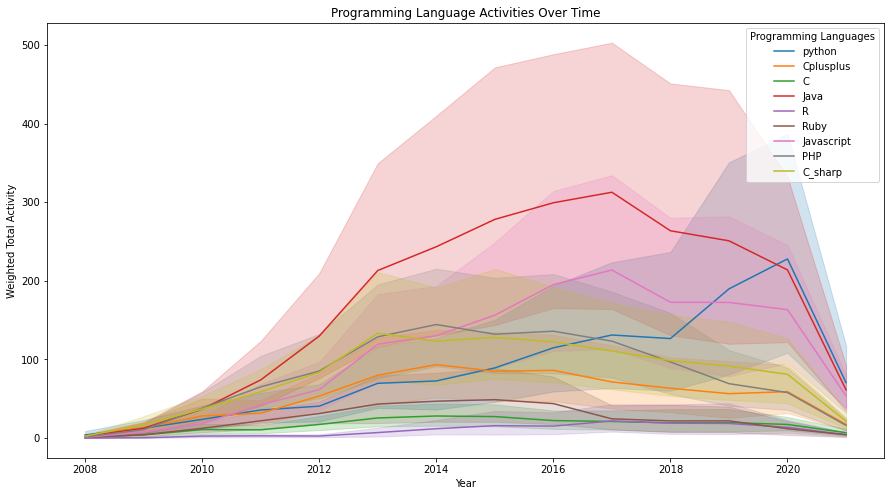

In [298]:
plt.figure(figsize=(15, 8))

# Iterate through each language to plot its trend
for lang in languages:
    column_name = f'{lang}_total_weighted_activity' 
    if column_name in merged_tags.columns: 
        sns.lineplot(x='Year', y=column_name, data=merged_tags, label=lang)

plt.title('Programming Language Activities Over Time')
plt.xlabel('Year')
plt.ylabel('Weighted Total Activity')
plt.legend(title='Programming Languages')
plt.show()

- All programming languages are experiencing growth of total activitiy from 2012. In the early years (2008-2012), there was more diversity in language activity, with no single language showing clear dominance.
- Starting from around 2012, Java's activity level has increased dramatically, surpassing all other languages by a significant margin by 2020, though it has been overtaken by Python in later years.
- PHP and, to a lesser extent, C# show some decline in activity towards the later years, with other languages like Python and JavaScript becoming more prominent.

In [300]:
top_10_regions = merged_tags.groupby('NUTS3CODE')['activity'].sum().sort_values(ascending=False)
top_10_regions = top_10_regions.nlargest(10)
top_10_regions

NUTS3CODE
PL911    352021.0
PL217    175667.0
PL514    126985.0
PL415     87758.5
PL633     83104.0
PL22A     55325.0
PL711     42128.0
PL613     37946.5
PL424     33208.5
PL814     30172.0
Name: activity, dtype: float64

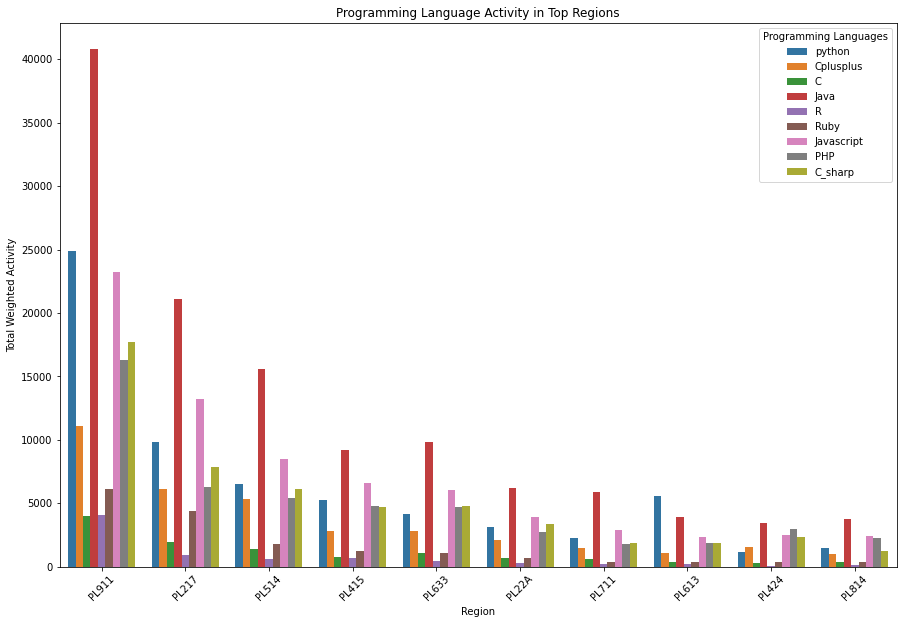

In [301]:
# Extract the NUTS3CODEs of the top 10 regions
top_regions_codes = top_10_regions.index

# Initialize a dictionary to store language activity data for top regions
top_regions_language_activity = {}

# Analyze language activity in each top region
for region in top_regions_codes:
    region_data = merged_tags[merged_tags['NUTS3CODE'] == region]
    language_activity = {}
    for lang in languages:
        language_activity[lang] = region_data[f'{lang}_total_weighted_activity'].sum()
    top_regions_language_activity[region] = language_activity

# Convert the dictionary to a DataFrame for easier plotting
activity_df = pd.DataFrame(top_regions_language_activity).T

# Reset index to make the regions a column in the DataFrame
activity_df.reset_index(inplace=True)
activity_df.rename(columns={'index': 'Region'}, inplace=True)

# Melt the DataFrame to long format, suitable for seaborn barplot
melted_df = activity_df.melt(id_vars=['Region'], var_name='Programming Language', value_name='Total Weighted Activity')

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='Region', y='Total Weighted Activity', hue='Programming Language', data=melted_df, palette='tab10')
plt.title('Programming Language Activity in Top Regions')
plt.xticks(rotation=45)
plt.legend(title='Programming Languages')
plt.show()

- The overall trend seems to be that Java, Javascript and Python have the highest activity levels, suggesting they are the most discussed or used languages in these regions on Stack Overflow.
- The chart suggests that some programming languages have a dominant presence in certain regions. For instance, region PL911 has significantly high activity for Python, which stands out with the tallest bar in the chart.
- While Java appears to be highly active in the region PL911, its activity decreases in other regions. Similarly, other languages like Javascript and Python also show varying levels of activity across different regions.

In [302]:
# Sort data by years
merged_tags.sort_values(by='Year', inplace=True)

# Calculate year-over-year growth for each programming language
for lang in languages:
    activity_col = f'{lang}_total_weighted_activity'
    growth_col = f'{lang}_yoy_growth'
    merged_tags[growth_col] = merged_tags.groupby('NUTS3CODE')[activity_col].pct_change() * 100


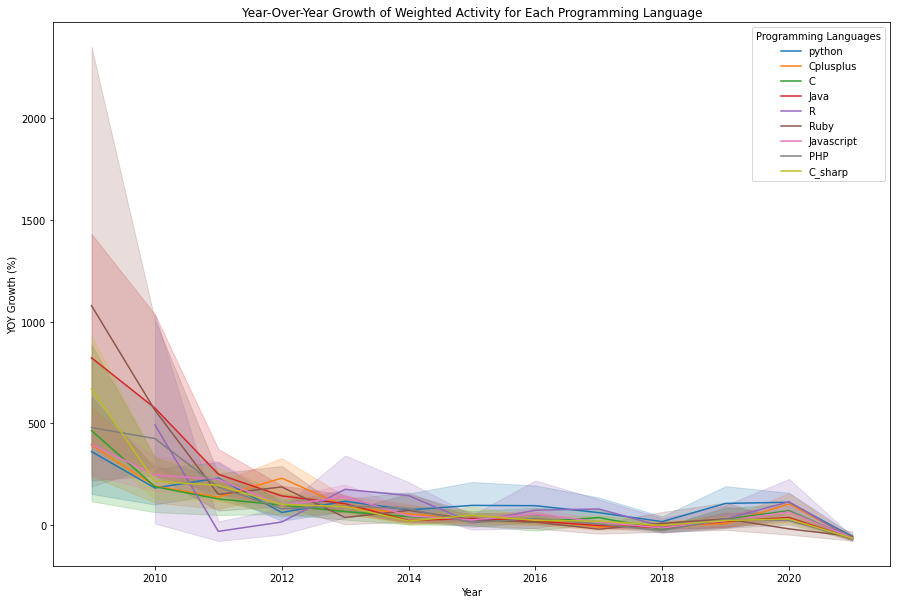

In [303]:
plt.figure(figsize=(15, 10))

# Iterate through each language to plot its year-over-year growth trend
for lang in languages:
    growth_col = f'{lang}_yoy_growth'
    sns.lineplot(x='Year', y=growth_col, data=merged_tags, label=lang)

plt.title('Year-Over-Year Growth of Weighted Activity for Each Programming Language')
plt.xlabel('Year')
plt.ylabel('YOY Growth (%)')
plt.legend(title='Programming Languages')
plt.show()

- There's a significant spike in growth for all languages at the start of the timeline, which could be due to the Stack Overflow gaining popularity in 2008. After the initial surge, growth rates drop sharply and begin to normalize.
- Python shows a prominent growth rate, which remains relatively high throughout the years compared to other languages.

### Analysis of programming lanaguages dataset with the economic factors 

In [305]:
pl =pd.read_excel('all_factors_nuts3.xlsx')
pl

Unnamed: 0.1  Unnamed: 0 NUTS3 CODE  TIME_PERIOD  POP (THS)  EMP (THS)  \
0                0           0      PL213         2007     756.30      428.6   
1                1           1      PL213         2008     756.40      428.6   
2                2           2      PL213         2009     761.42      428.6   
3                3           3      PL213         2010     757.11      428.6   
4                4           4      PL213         2011     758.21      433.6   
...            ...         ...        ...          ...        ...        ...   
1017          1017        1017      PL926         2016     259.80      108.3   
1018          1018        1018      PL926         2017     259.70      107.8   
1019          1019        1019      PL926         2018     259.80      107.4   
1020          1020        1020      PL926         2019     259.10      107.1   
1021          1021        1021      PL926         2020     258.80      107.8   

      EUR_HAB  EUR_HAB_EU27_2020   MIO_EUR   MIO_NAC  ...  GVA (MIO_EUR)  \
0       13200                 54   9982.27  37769.90  ...        8712.37   
1       15100                 60  11393.55  40015.30  ...        9939.92   
2       12800                 53   9755.34  42217.21  ...        8659.07   
3       14600                 58  11017.52  44011.69  ...        9594.71   
4       15300                 60  11581.62  47723.22  ...       10093.43   
...       ...                ...       ...       ...  ...            ...   
1017     9800                 35   2556.74  11155.56  ...        2272.64   
1018    10500                 36   2739.42  11661.73  ...        2425.65   
1019    11000                 36   2857.49  12177.18  ...        2502.64   
1020    11700                 37   3040.11  13065.19  ...        2671.96   
1021    12000                 40   3093.94  13746.36  ...        2725.19   

      GVA (MIO_NAC)          Kod  Studenci do Ludności w wieku 19-24  \
0             32965  11212100000                                 NaN   
1             34910  11212100000                               255.5   
2             37473  11212100000                               272.2   
3             38328  11212100000                               254.7   
4             41591  11212100000                               272.8   
...             ...          ...                                 ...   
1017           9916  71427300000                                 3.8   
1018          10326  71427300000                                 5.5   
1019          10665  71427300000                                 6.7   
1020          11483  71427300000                                 2.1   
1021          12108  71427300000                                 7.2   

      population men  population women  Mean_salary  Studenci  \
0                NaN               NaN          NaN       NaN   
1                NaN               NaN      3259.63       NaN   
2                NaN               NaN      3423.56       NaN   
3                NaN               NaN      3543.43       NaN   
4                NaN               NaN      3722.48       NaN   
...              ...               ...          ...       ...   
1017             0.0               0.0      4111.52     718.0   
1018             0.0               0.0      4341.10     990.0   
1019            71.9              80.8      4582.52    1146.0   
1020            72.2              80.6      4902.14     344.0   
1021            70.9              79.3      5319.27    1129.0   

      population in cities in %  Tech Universities; students  
0                           NaN                          NaN  
1                           NaN                      45461.0  
2                           NaN                      46251.0  
3                           NaN                      48352.0  
4                           NaN                      50035.0  
...                         ...                          ...  
1017                      45.59              

In [306]:
final_data = pd.merge(tags, pl, left_on='NUTS3CODE', right_on='NUTS3 CODE', how='left')
final_data.columns

Index(['NUTS3CODE', 'Year', 'questioncount', 'answercount',
       'dpythonanswercount', 'dpythonquestioncount', 'dCplusplusanswercount',
       'dCplusplusquestioncount', 'dCanswercount', 'dCquestioncount',
       'dJavaanswercount', 'dJavaquestioncount', 'dRanswercount',
       'dRquestioncount', 'dRubyanswercount', 'dRubyquestioncount',
       'dJavascriptanswercount', 'dJavascriptquestioncount', 'dPHPanswercount',
       'dPHPquestioncount', 'dC_sharpanswercount', 'dC_sharpquestioncount',
       'ddpythonanswercount', 'ddpythonquestioncount',
       'ddCplusplusanswercount', 'ddCplusplusquestioncount', 'ddCanswercount',
       'ddCquestioncount', 'ddJavaanswercount', 'ddJavaquestioncount',
       'ddRanswercount', 'ddRquestioncount', 'ddRubyanswercount',
       'ddRubyquestioncount', 'ddJavascriptanswercount',
       'ddJavascriptquestioncount', 'ddPHPanswercount', 'ddPHPquestioncount',
       'ddC_sharpanswercount', 'ddC_sharpquestioncount', 'Unnamed: 0.1',
       'Unnamed: 0', 'N

In [307]:
# Calculate GDP per capita again
final_data["GDP_per_capita"] = final_data["MIO_EUR"] / final_data["POP (THS)"]
final_data["GDP_per_capita"]

0         5.516053
1         6.888561
2         5.769974
3         6.386241
4         6.931948
           ...    
13729     9.841186
13730    10.548402
13731    10.998807
13732    11.733346
13733    11.954946
Name: GDP_per_capita, Length: 13734, dtype: float64

In [308]:
# Define the weights for questions and answers
weights = {'questions': 0.5, 'answers': 0.5}

# Iterate over the dictionary to calculate total weighted activity for each language
for lang, columns in languages.items():
    question_columns = [col for col in columns if 'questioncount' in col]
    answer_columns = [col for col in columns if 'answercount' in col]

    weighted_questions = final_data[question_columns].sum(axis=1) * weights['questions']
    weighted_answers = final_data[answer_columns].sum(axis=1) * weights['answers']

    final_data[f'{lang}_total_weighted_activity'] = weighted_questions + weighted_answers

In [309]:
# Reattempt to calculate GDP per capita
final_data["GDP_per_capita"] = final_data["MIO_EUR"] / final_data["POP (THS)"]
final_data["GDP_per_capita"]

0         5.516053
1         6.888561
2         5.769974
3         6.386241
4         6.931948
           ...    
13729     9.841186
13730    10.548402
13731    10.998807
13732    11.733346
13733    11.954946
Name: GDP_per_capita, Length: 13734, dtype: float64

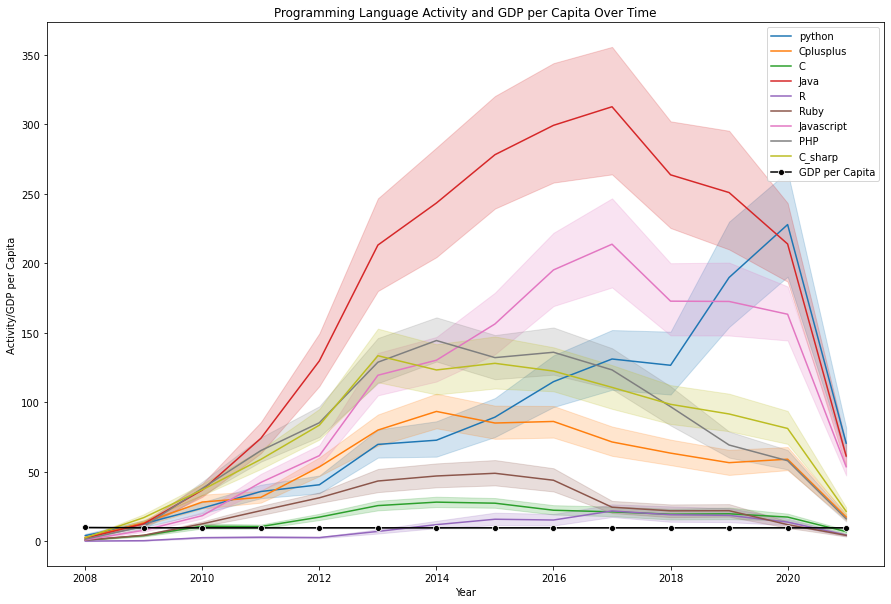

In [310]:
plt.figure(figsize=(15, 10))

# Plotting programming language activity
for lang in languages:
    activity_col = f'{lang}_total_weighted_activity'
    sns.lineplot(x='Year', y=activity_col, data=final_data, label=lang)

# Plotting GDP per capita
sns.lineplot(x='Year', y='GDP_per_capita', data=final_data, label='GDP per Capita', color='black', marker="o")

plt.title('Programming Language Activity and GDP per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('Activity/GDP per Capita')
plt.legend()
plt.show()

- Programming language activity seems to be influenced by other factors, potentially including changes in technology trends, educational policies, or global events

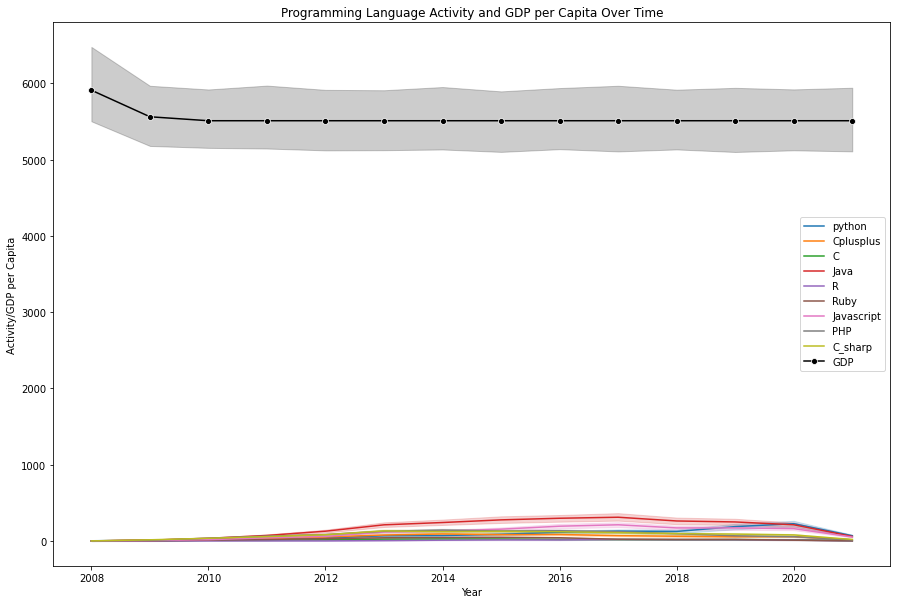

In [311]:
plt.figure(figsize=(15, 10))

# Plotting programming language activity
for lang in languages:
    activity_col = f'{lang}_total_weighted_activity'
    sns.lineplot(x='Year', y=activity_col, data=final_data, label=lang)

# Plotting GDP per capita
sns.lineplot(x='Year', y='MIO_EUR', data=final_data, label='GDP', color='black', marker="o")

plt.title('Programming Language Activity and GDP per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('Activity/GDP per Capita')
plt.legend()
plt.show()

### Regional Correlation between programming languages and economic factors

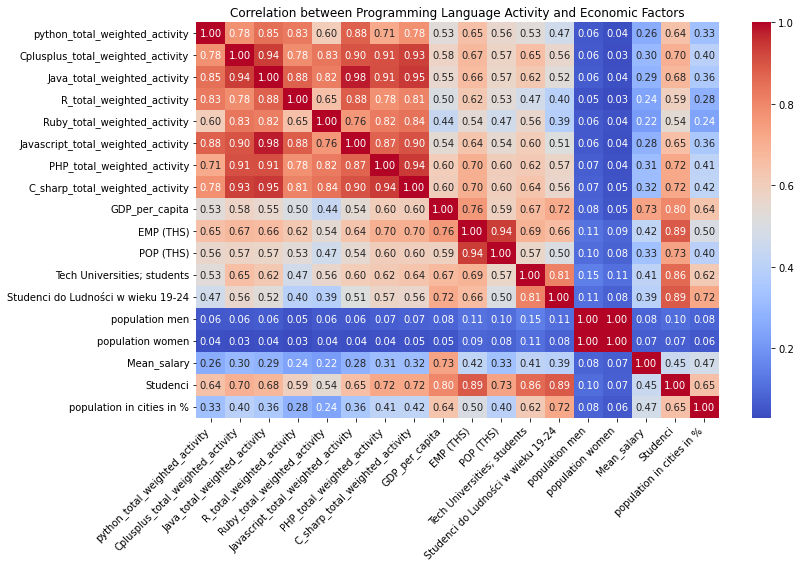

In [348]:
# list of the weighted activity columns for the programming languages
weighted_activities = [f'{lang}_total_weighted_activity' for lang in languages]

# factors
economic_factors = ['GDP_per_capita', 'EMP (THS)', 'POP (THS)', 'Tech Universities; students', 'Studenci do Ludności w wieku 19-24', 'population men',
       'population women', 'Mean_salary', 'Studenci', 'population in cities in %'] 

# Select only the weighted activity and economic factor columns for the correlation analysis
selected_columns = weighted_activities + economic_factors
selected_data = final_data[selected_columns]

# Calculate the correlation matrix for the selected columns
correlation_matrix = selected_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Programming Language Activity and Economic Factors')
plt.xticks(rotation=45, ha='right')  # Improve readability of x-axis labels
plt.yticks(rotation=0)  # Improve readability of y-axis labels
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap
plt.show()

- The socio-economic factors such as EMP (THS) (employment in thousands) and numner of Students Tech Universities have positive correlations with programming language activities, though not as strong as the correlations between the languages themselves. This suggests that higher employment rates and the presence of technical universities might be associated with higher programming language activity.
- Many programming languages show strong positive correlations with each other, suggesting that regions with high activity in one language also tend to have high activity in others.
- 'Population in cities in %' has a slight negative correlation with some programming languages, meaning that regions with a higher percentage of the population in cities might have slightly lower activity in those languages. 

In [313]:
import statsmodels.api as sm

languages = ['python', 'Cplusplus', 'Java', 'R', 'Ruby', 'Javascript', 'PHP', 'C_sharp']
gdp_per_capita = final_data['GDP_per_capita']
results = {}

for lang in languages:
    # Prepare the independent variable
    X_lang = final_data[f'{lang}_total_weighted_activity']
    
    # Add a constant to the independent variables
    X_lang = sm.add_constant(X_lang)
    
    # Fit the regression model
    model = sm.OLS(gdp_per_capita, X_lang, missing='drop').fit()
    
    # Store the results
    results[lang] = {
        'Coefficient': model.params[1],
        'P-value': model.pvalues[1],
        'R-squared': model.rsquared
    }

for lang, result in results.items():
    print(f"{lang} Coefficient: {result['Coefficient']}, P-value: {result['P-value']}, R-squared: {result['R-squared']}")

python Coefficient: 0.007362247922171873, P-value: 0.0, R-squared: 0.27938312386649733
Cplusplus Coefficient: 0.017888924242479808, P-value: 0.0, R-squared: 0.3342767252877854
Java Coefficient: 0.0047156449994244795, P-value: 0.0, R-squared: 0.30783953563513744
R Coefficient: 0.042761147542792144, P-value: 0.0, R-squared: 0.2494436931902354
Ruby Coefficient: 0.021574535411973503, P-value: 0.0, R-squared: 0.19149882830298248
Javascript Coefficient: 0.007637254338592264, P-value: 0.0, R-squared: 0.29001309894770355
PHP Coefficient: 0.013350276167089385, P-value: 0.0, R-squared: 0.3620339918786333
C_sharp Coefficient: 0.012364083406666039, P-value: 0.0, R-squared: 0.3611071281391479


### Warsaw as an outlier for GDP per capita

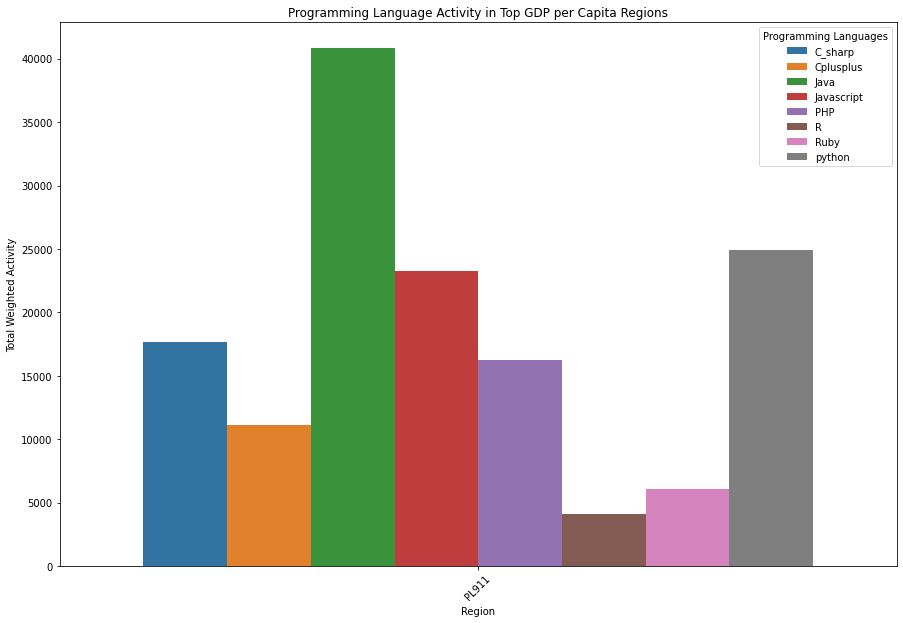

In [314]:
# Extract top regions based on GDP per capita
top_gdp_regions = final_data.sort_values(by='GDP_per_capita', ascending=False).head(10)['NUTS3CODE']

# Initialize a dictionary to store language activity data for top GDP regions
top_gdp_regions_language_activity = {}

# Analyze language activity in each top GDP region
for region in top_gdp_regions:
    region_data = merged_tags[merged_tags['NUTS3CODE'] == region]
    language_activity = {}
    for lang in languages:
        language_activity[lang] = region_data[f'{lang}_total_weighted_activity'].sum()
    top_gdp_regions_language_activity[region] = language_activity

# Convert the dictionary to a DataFrame
gdp_activity_df = pd.DataFrame(top_gdp_regions_language_activity).T

# Reset index and melt for plotting
gdp_activity_df.reset_index(inplace=True)
gdp_activity_df.rename(columns={'index': 'Region'}, inplace=True)
melted_gdp_df = gdp_activity_df.melt(id_vars=['Region'], var_name='Programming Language', value_name='Total Weighted Activity')

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='Region', y='Total Weighted Activity', hue='Programming Language', data=melted_gdp_df, palette='tab10')
plt.title('Programming Language Activity in Top GDP per Capita Regions')
plt.xticks(rotation=45)
plt.legend(title='Programming Languages')
plt.show()

In [315]:
# Aggregate data by region
gdp_per_capita_by_region = final_data.groupby('NUTS3CODE')['GDP_per_capita'].mean().sort_values(ascending=False)

# Print out the sorted values
print(gdp_per_capita_by_region)

# Check if Warsaw is significantly higher
warsaw_gdp_per_capita = gdp_per_capita_by_region.loc['PL911']  
print(f"Warsaw GDP per Capita: {warsaw_gdp_per_capita}")

# Compare with other regions
print("Comparison with other regions:")
print(gdp_per_capita_by_region / warsaw_gdp_per_capita)

NUTS3CODE
PL911    31.629260
PL415    21.389739
PL514    17.509407
PL516    15.953777
PL923    15.541057
           ...    
PL821     6.450418
PL623     6.312245
PL219     6.224779
PL812     5.959366
PL822     5.827647
Name: GDP_per_capita, Length: 71, dtype: float64
Warsaw GDP per Capita: 31.629259890582247
Comparison with other regions:
NUTS3CODE
PL911    1.000000
PL415    0.676264
PL514    0.553583
PL516    0.504399
PL923    0.491351
           ...   
PL821    0.203938
PL623    0.199570
PL219    0.196804
PL812    0.188413
PL822    0.184249
Name: GDP_per_capita, Length: 71, dtype: float64


In [279]:
import pandas as pd
from scipy.stats import zscore

final_data['GDP_per_capita_zscore'] = zscore(final_data['GDP_per_capita'])

# Identify outliers
outliers = final_data[abs(final_data['GDP_per_capita_zscore']) > 3]
print("Outlier Regions in GDP per Capita:")
print(outliers[['NUTS3CODE', 'GDP_per_capita', 'GDP_per_capita_zscore']])

Outlier Regions in GDP per Capita:
      NUTS3CODE  GDP_per_capita  GDP_per_capita_zscore
2936      PL415       24.205820               3.386098
2937      PL415       25.444996               3.673144
2938      PL415       27.957297               4.255099
2939      PL415       28.034395               4.272958
2950      PL415       24.205820               3.386098
...         ...             ...                    ...
12385     PL911       32.176207               5.232377
12386     PL911       35.775563               6.066141
12387     PL911       38.263962               6.642559
12388     PL911       41.016156               7.280084
12389     PL911       40.611795               7.186417

[280 rows x 3 columns]


### Correlations change year over year 

In [316]:
# Initialize a DataFrame to store yearly correlation coefficients
yearly_correlations = pd.DataFrame()

# Loop through each year and calculate correlations
for year in final_data['Year'].unique():
    yearly_data = final_data[final_data['Year'] == year]
    corr_matrix = yearly_data[selected_columns].corr()  # selected_columns from the previous step
    # We are interested in the correlations of language activities with GDP_per_capita
    correlations = corr_matrix['GDP_per_capita'].drop('GDP_per_capita')  # Drop self-correlation
    yearly_correlations[year] = correlations

# Transpose the DataFrame for easier plotting
yearly_correlations = yearly_correlations.T

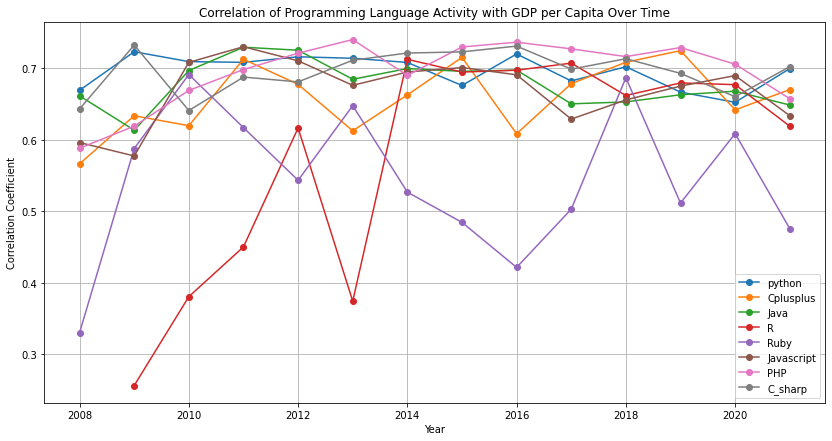

In [317]:
# Plotting the trends of correlations over time
plt.figure(figsize=(14, 7))

# Loop through each programming language to plot its trend
for language in languages:
    plt.plot(yearly_correlations.index, yearly_correlations[f'{language}_total_weighted_activity'], marker='o', label=language)

plt.title('Correlation of Programming Language Activity with GDP per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.legend()
plt.grid(True)
plt.show()

- Ruby and R have an interesting correlation with GDP per capita as it changes over time, making them outliers. Such fluctuations could be due to the niche nature of these languages; R is often used in statistics and data analysis, and Ruby had a surge in popularity with the rise of Rails, which may coincide with certain economic trends or technological booms.
- It appears that the correlations stabilize somewhat in the more recent years for most languages, hovering around the 0.6 mark. This could suggest that the relationship between programming language activity and GDP per capita has reached a steady state in recent years, or it could reflect a maturation of the tech industry where economic growth and programming activities are consistently interlinked.

- This model provides a moderate level of explanation for the variance in GDP per capita using programming activities and economic indicators.

In [320]:
# Filter the data to include only the years 2008-2018 as for Tech Universities Students factor the data is betweenn 2008 - 2018
filtered_data = final_data[(final_data['Year'] >= 2008) & (final_data['Year'] <= 2018)]

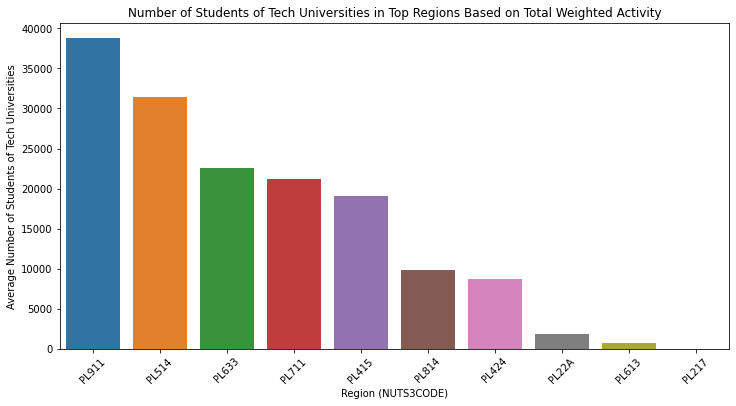

In [321]:
# calculate the total weighted activity for each region
final_data['total_weighted_activity'] = final_data[[f'{lang}_total_weighted_activity' for lang in languages]].sum(axis=1)

# the top regions based on total weighted activity
top_regions = final_data.groupby('NUTS3CODE')['total_weighted_activity'].sum().nlargest(10).index

# Filter the data to include only the top regions
top_regions_data = final_data[final_data['NUTS3CODE'].isin(top_regions)]

top_regions_universities = top_regions_data.groupby('NUTS3CODE')['Tech Universities; students'].mean().reset_index()

# Now let's plot the number of students oftech universities for the top regions
plt.figure(figsize=(12, 6))
sns.barplot(x='NUTS3CODE', y='Tech Universities; students', data=top_regions_universities, order=top_regions_universities.sort_values('Tech Universities; students', ascending=False)['NUTS3CODE'])
plt.title('Number of Students of Tech Universities in Top Regions Based on Total Weighted Activity')
plt.xlabel('Region (NUTS3CODE)')
plt.ylabel('Average Number of Students of Tech Universities')
plt.xticks(rotation=45)
plt.show()

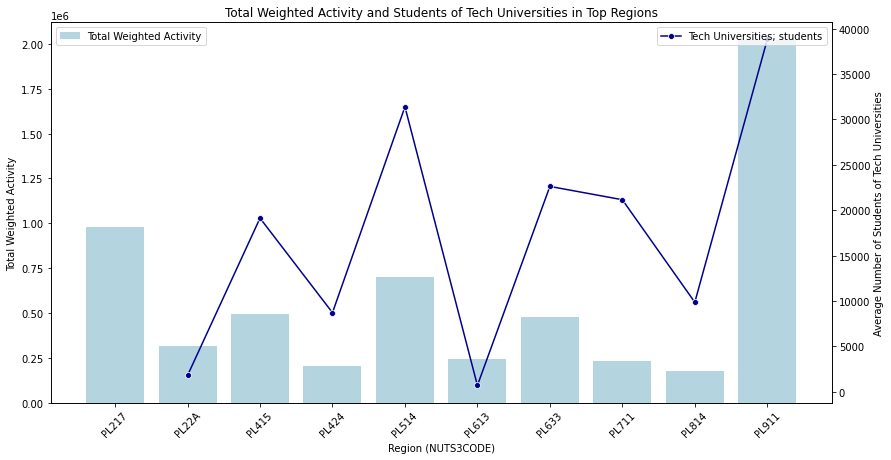

In [322]:
# Find top regions based on total weighted activity
top_regions_activity = final_data.groupby('NUTS3CODE')['total_weighted_activity'].sum().nlargest(10)

# Merge this info back with the main DataFrame to get Students of tech universities for these top regions
top_regions_data = final_data[final_data['NUTS3CODE'].isin(top_regions_activity.index)]
top_regions_universities = top_regions_data.groupby('NUTS3CODE')['Tech Universities; students'].mean()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'Total Weighted Activity': top_regions_activity,
    'Tech Universities; students': top_regions_universities
}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Total Weighted Activity
sns.barplot(x='NUTS3CODE', y='Total Weighted Activity', data=plot_data, ax=ax1, color='lightblue', label='Total Weighted Activity')

# Create a secondary y-axis for the Number of Tech Universities
ax2 = ax1.twinx()
sns.lineplot(x='NUTS3CODE', y='Tech Universities; students', data=plot_data, ax=ax2, color='darkblue', marker='o', label='Tech Universities; students')

# Finalize the plot
ax1.set_title('Total Weighted Activity and Students of Tech Universities in Top Regions')
ax1.set_xlabel('Region (NUTS3CODE)')
ax1.set_ylabel('Total Weighted Activity')
ax2.set_ylabel('Average Number of Students of Tech Universities')
ax1.set_xticklabels(plot_data['NUTS3CODE'], rotation=45)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

- There appears to be a positive correlation in some regions, where a higher number of students tech universities is associated with greater programming activity.
- The region represented by the last bar on the right has a disproportionately high number of tech students compared to the total programming activity. This could indicate that while there is a significant potential base of technically educated individuals, it may not directly translate into visible programming activity, possibly due to factors like employment opportunities in non-technical fields
- The correlation varies in differnt regions, the programming activities and number of students at tech universities can to certain extand influece each other.

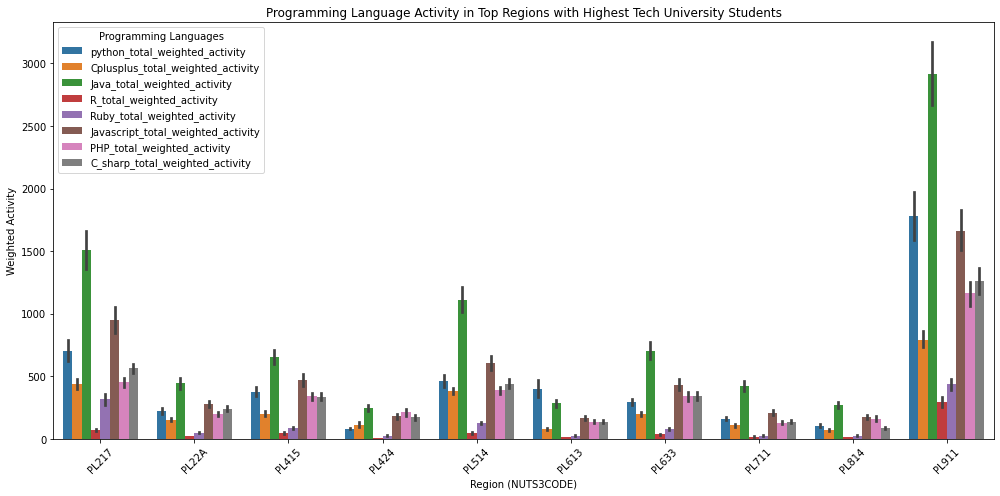

In [323]:
# Filter the data to include only the top regions
top_regions_data = final_data[final_data['NUTS3CODE'].isin(top_regions_activity.index)]

# Now, let's prepare the data for plotting by melting it into a long format
melted_data = pd.melt(top_regions_data, id_vars='NUTS3CODE', value_vars=[f'{lang}_total_weighted_activity' for lang in languages],
                      var_name='Language', value_name='Weighted Activity')

sns.lineplot(x='NUTS3CODE', y='Tech Universities; students', data=plot_data, ax=ax2, color='darkblue', marker='o', label='Tech Universities; students')
# Plotting the bar chart
plt.figure(figsize=(14, 7))
sns.barplot(data=melted_data, x='NUTS3CODE', y='Weighted Activity', hue='Language')
plt.title('Programming Language Activity in Top Regions with Highest Tech University Students')
plt.xlabel('Region (NUTS3CODE)')
plt.ylabel('Weighted Activity')
plt.legend(title='Programming Languages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [324]:
tech_uni_data = filtered_data.groupby('Year')['Tech Universities; students'].sum().reset_index()

# calculate the total weighted activity for each programming language per year
total_activity_per_year = {}
for lang in languages:
    activity_per_year = filtered_data.groupby('Year')[f'{lang}_total_weighted_activity'].sum().reset_index()
    total_activity_per_year[lang] = activity_per_year

# Now we can plot the total activity for each language and the number of students of tech universities on the same chart
plt.figure(figsize=(14, 7))
# Create a secondary y-axis for the number of students of tech universities
ax1 = plt.gca()
ax2 = ax1.twinx()

# Loop through each programming language and plot its activity trend
for lang in languages:
    ax1.plot(total_activity_per_year[lang]['Year'], total_activity_per_year[lang][f'{lang}_total_weighted_activity'], marker='o', label=f'{lang} Activity')

# Now plot the number of students of tech universities
ax2.plot(tech_uni_data['Year'], tech_uni_data['Tech Universities; students'], marker='s', color='black', label='Number of Student of Tech Universities', linestyle='--')

# Labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Weighted Activity')
ax2.set_ylabel('Number of Students of Tech Universities')
ax1.set_title('Programming Language Activity vs. Number of Students of Tech Universities (2008-2018)')

# Legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

### Calculating the correlations and initial OLS regiression for each programming language and regression before clustering 

In [318]:
import scipy.stats

# Calculate the Pearson correlation coefficient and p-value for each language
correlations = {}
for language in languages:
    activity_col = f'{language}_total_weighted_activity'
    corr, p_value = scipy.stats.pearsonr(final_data[activity_col], final_data['GDP_per_capita'])
    correlations[language] = (corr, p_value)

correlations

{'python': (0.5285670476547863, 0.0),
 'Cplusplus': (0.5781666933400658, 0.0),
 'Java': (0.5548328898282234, 0.0),
 'R': (0.4994433833681605, 0.0),
 'Ruby': (0.4376057909842859, 0.0),
 'Javascript': (0.5385286426437352, 0.0),
 'PHP': (0.6016926058035226, 0.0),
 'C_sharp': (0.600921898535199, 0.0)}

In [358]:
import statsmodels.api as sm

# Define the independent variables
independent_vars = [
    'Cplusplus_total_weighted_activity', 'C_total_weighted_activity',
       'Java_total_weighted_activity', 'R_total_weighted_activity',
       'Ruby_total_weighted_activity', 'Javascript_total_weighted_activity',
       'PHP_total_weighted_activity', 'C_sharp_total_weighted_activity',
       'python_total_weighted_activity',
            # Economic indicators

]

# Add a constant to the independent variables matrix
X = sm.add_constant(final_data[independent_vars])

# Define the dependent variable
y = final_data['GDP_per_capita']

# Fit the regression model
model = sm.OLS(y, X, missing='drop').fit()  # 'missing=drop' automatically drops any NaNs

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         GDP_per_capita   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     1151.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:07:57   Log-Likelihood:                -35714.
No. Observations:               13734   AIC:                         7.145e+04
Df Residuals:                   13724   BIC:                         7.152e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  8.3951      0.032    265.483      0.000       8.333       8.457
Cplusplus_total_weighted_activity      0.0049      0.001      6.751      0.000       0.003       0.006
C_total_weighted_activity              0.0187      0.002      8.981      0.000       0.015       0.023
Java_total_weighted_activity          -0.0046      0.000    -11.274      0.000      -0.005      -0.004
R_total_weighted_activity             -0.0005      0.001     -0.387      0.699      -0.003       0.002
Ruby_total_weighted_activity          -0.0128      0.001    -19.457      0.000      -0.014      -0.012
Javascript_total_weighted_activity    -0.0017      0.001     -3.330      0.001      -0.003      -0.001
PHP_total_weighted_activity            0.0104      0.000     22.814      0.000       0.010       0.011
C_sharp_total_weighted_activity        0.0093      0.001     17.315      0.000       0.008       0.010
python_total_weighted_activity         0.0039      0.000     18.532      0.000       0.003       0.004
==============================================================================
Omnibus:                     5439.845   Durbin-Watson:                   0.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43908.646
Skew:                           1.693   Prob(JB):                         0.00
Kurtosis:                      11.079   Cond. No.                         869.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The R-squared value of 0.430 suggests that approximately 43% of the variability in 'GDP_per_capita' is explained by your model. While not negligible, this leaves a significant portion of the variance unexplained, indicating that there are other important factors influencing GDP per capita that are not included in your model.

### Clustering regions 
We will investinge 3 different veriosn of clusters

In [325]:
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import warnings
import numpy as np

### Clustering Model 1 with all programming languages and GDP per capita, population, employment

In [353]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

clustering_features = [
    # Programming language activities
    'Cplusplus_total_weighted_activity', 'C_total_weighted_activity',
    'Java_total_weighted_activity', 'R_total_weighted_activity',
    'Ruby_total_weighted_activity', 'Javascript_total_weighted_activity',
    'PHP_total_weighted_activity', 'C_sharp_total_weighted_activity',
    'python_total_weighted_activity',
    # Economic indicators
    'GDP_per_capita', 'POP (THS)', 'EMP (THS)'
]

data_for_clustering = final_data[clustering_features].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_for_clustering)

# Determine the optimal number of clusters using the elbow method
cost = []
K = range(1, 10) 
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, init="k-means++", n_init=5, random_state=42)
    kmeans.fit(scaled_features)
    cost.append(kmeans.inertia_)

plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# elbow method suggests 3 is the optimal number of clusters
optimal_num_clusters = 3
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
final_data['cluster'] = clusters  

# Analyze clusters to identify potential tech hubs
# Clusters with high average values in programming language activities are potential tech hubs
clustered_data = final_data.groupby('cluster')[clustering_features].mean()
print(clustered_data)

# Visualization
sns.pairplot(final_data, hue='cluster', vars=clustering_features)
plt.suptitle('Pairplot of Clustering Features by Cluster', y=1.02)
plt.show()

         Cplusplus_total_weighted_activity  C_total_weighted_activity  \
cluster                                                                 
0                                25.635397                   7.782433   
1                              1128.437500                 403.125000   
2                               379.760218                 113.596730   

         Java_total_weighted_activity  R_total_weighted_activity  \
cluster                                                            
0                           76.635785                   2.921477   
1                         4457.562500                 490.750000   
2                         1211.625341                  56.621253   

         Ruby_total_weighted_activity  Javascript_total_weighted_activity  \
cluster                                                                     
0                           10.429314                           51.964385   
1                          647.937500                         

- Cluster 0 represents regions with the lowest average programming activity and economic indicators. These areas are likely not tech hubs.
- Cluster 1 shows very high programming activity and the highest economic indicators. These characteristics suggest that regions in this cluster are strong candidates for being tech hubs.
- Cluster 2 has moderate levels of programming activity and economic indicators. These regions could be considered emerging tech hubs or areas with a growing tech presence.

In [354]:
# Identify which specific NUTS3CODE regions to Clusters
cluster_0 = final_data[final_data['cluster'] == 0]['NUTS3CODE'].unique()
cluster_1 = final_data[final_data['cluster'] == 1]['NUTS3CODE'].unique()
cluster_2 = final_data[final_data['cluster'] == 2]['NUTS3CODE'].unique()

# Display the regions
print("Regions in Cluster 1 (Established Tech Hubs):")
print(cluster_1)
print("Regions in Cluster 2 (Developing Tech Regions):")
print(cluster_2)

Regions in Cluster 1 (Established Tech Hubs):
['PL911']
Regions in Cluster 2 (Developing Tech Regions):
['PL217' 'PL22A' 'PL415' 'PL424' 'PL514' 'PL633' 'PL711' 'PL911']


In [355]:
import statsmodels.api as sm

clusters = final_data['cluster'].unique()

clustered_regression_results = {}

for cluster in clusters:
    cluster_data = final_data[final_data['cluster'] == cluster]
    
    X = cluster_data[independent_vars] 
    y = cluster_data['GDP_per_capita']

    X = sm.add_constant(X)  
    model = sm.OLS(y, X).fit()
    clustered_regression_results[cluster] = model

    print(f"Cluster {cluster} Regression Summary:")
    print(model.summary())
    print("\n")

Cluster 0 Regression Summary:
                            OLS Regression Results                            
Dep. Variable:         GDP_per_capita   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     209.6
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:47:50   Log-Likelihood:                -31225.
No. Observations:               12888   AIC:                         6.247e+04
Df Residuals:                   12878   BIC:                         6.254e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### Clustering Model 2 with all programming languages and GDP per capita, population, employment and eur hab

In [331]:
filtered_data = final_data[final_data['NUTS3CODE'] != 'PL911']

         Cplusplus_total_weighted_activity  C_total_weighted_activity  \
cluster                                                                 
0                                54.250046                  15.851399   
1                               416.517751                 124.374753   
2                                 9.980482                   3.187582   

         Java_total_weighted_activity  R_total_weighted_activity  \
cluster                                                            
0                          153.598110                   5.985548   
1                         1441.947732                  71.921105   
2                           32.063597                   1.032486   

         Ruby_total_weighted_activity  Javascript_total_weighted_activity  \
cluster                                                                     
0                           21.085140                          103.040022   
1                          205.852071                         

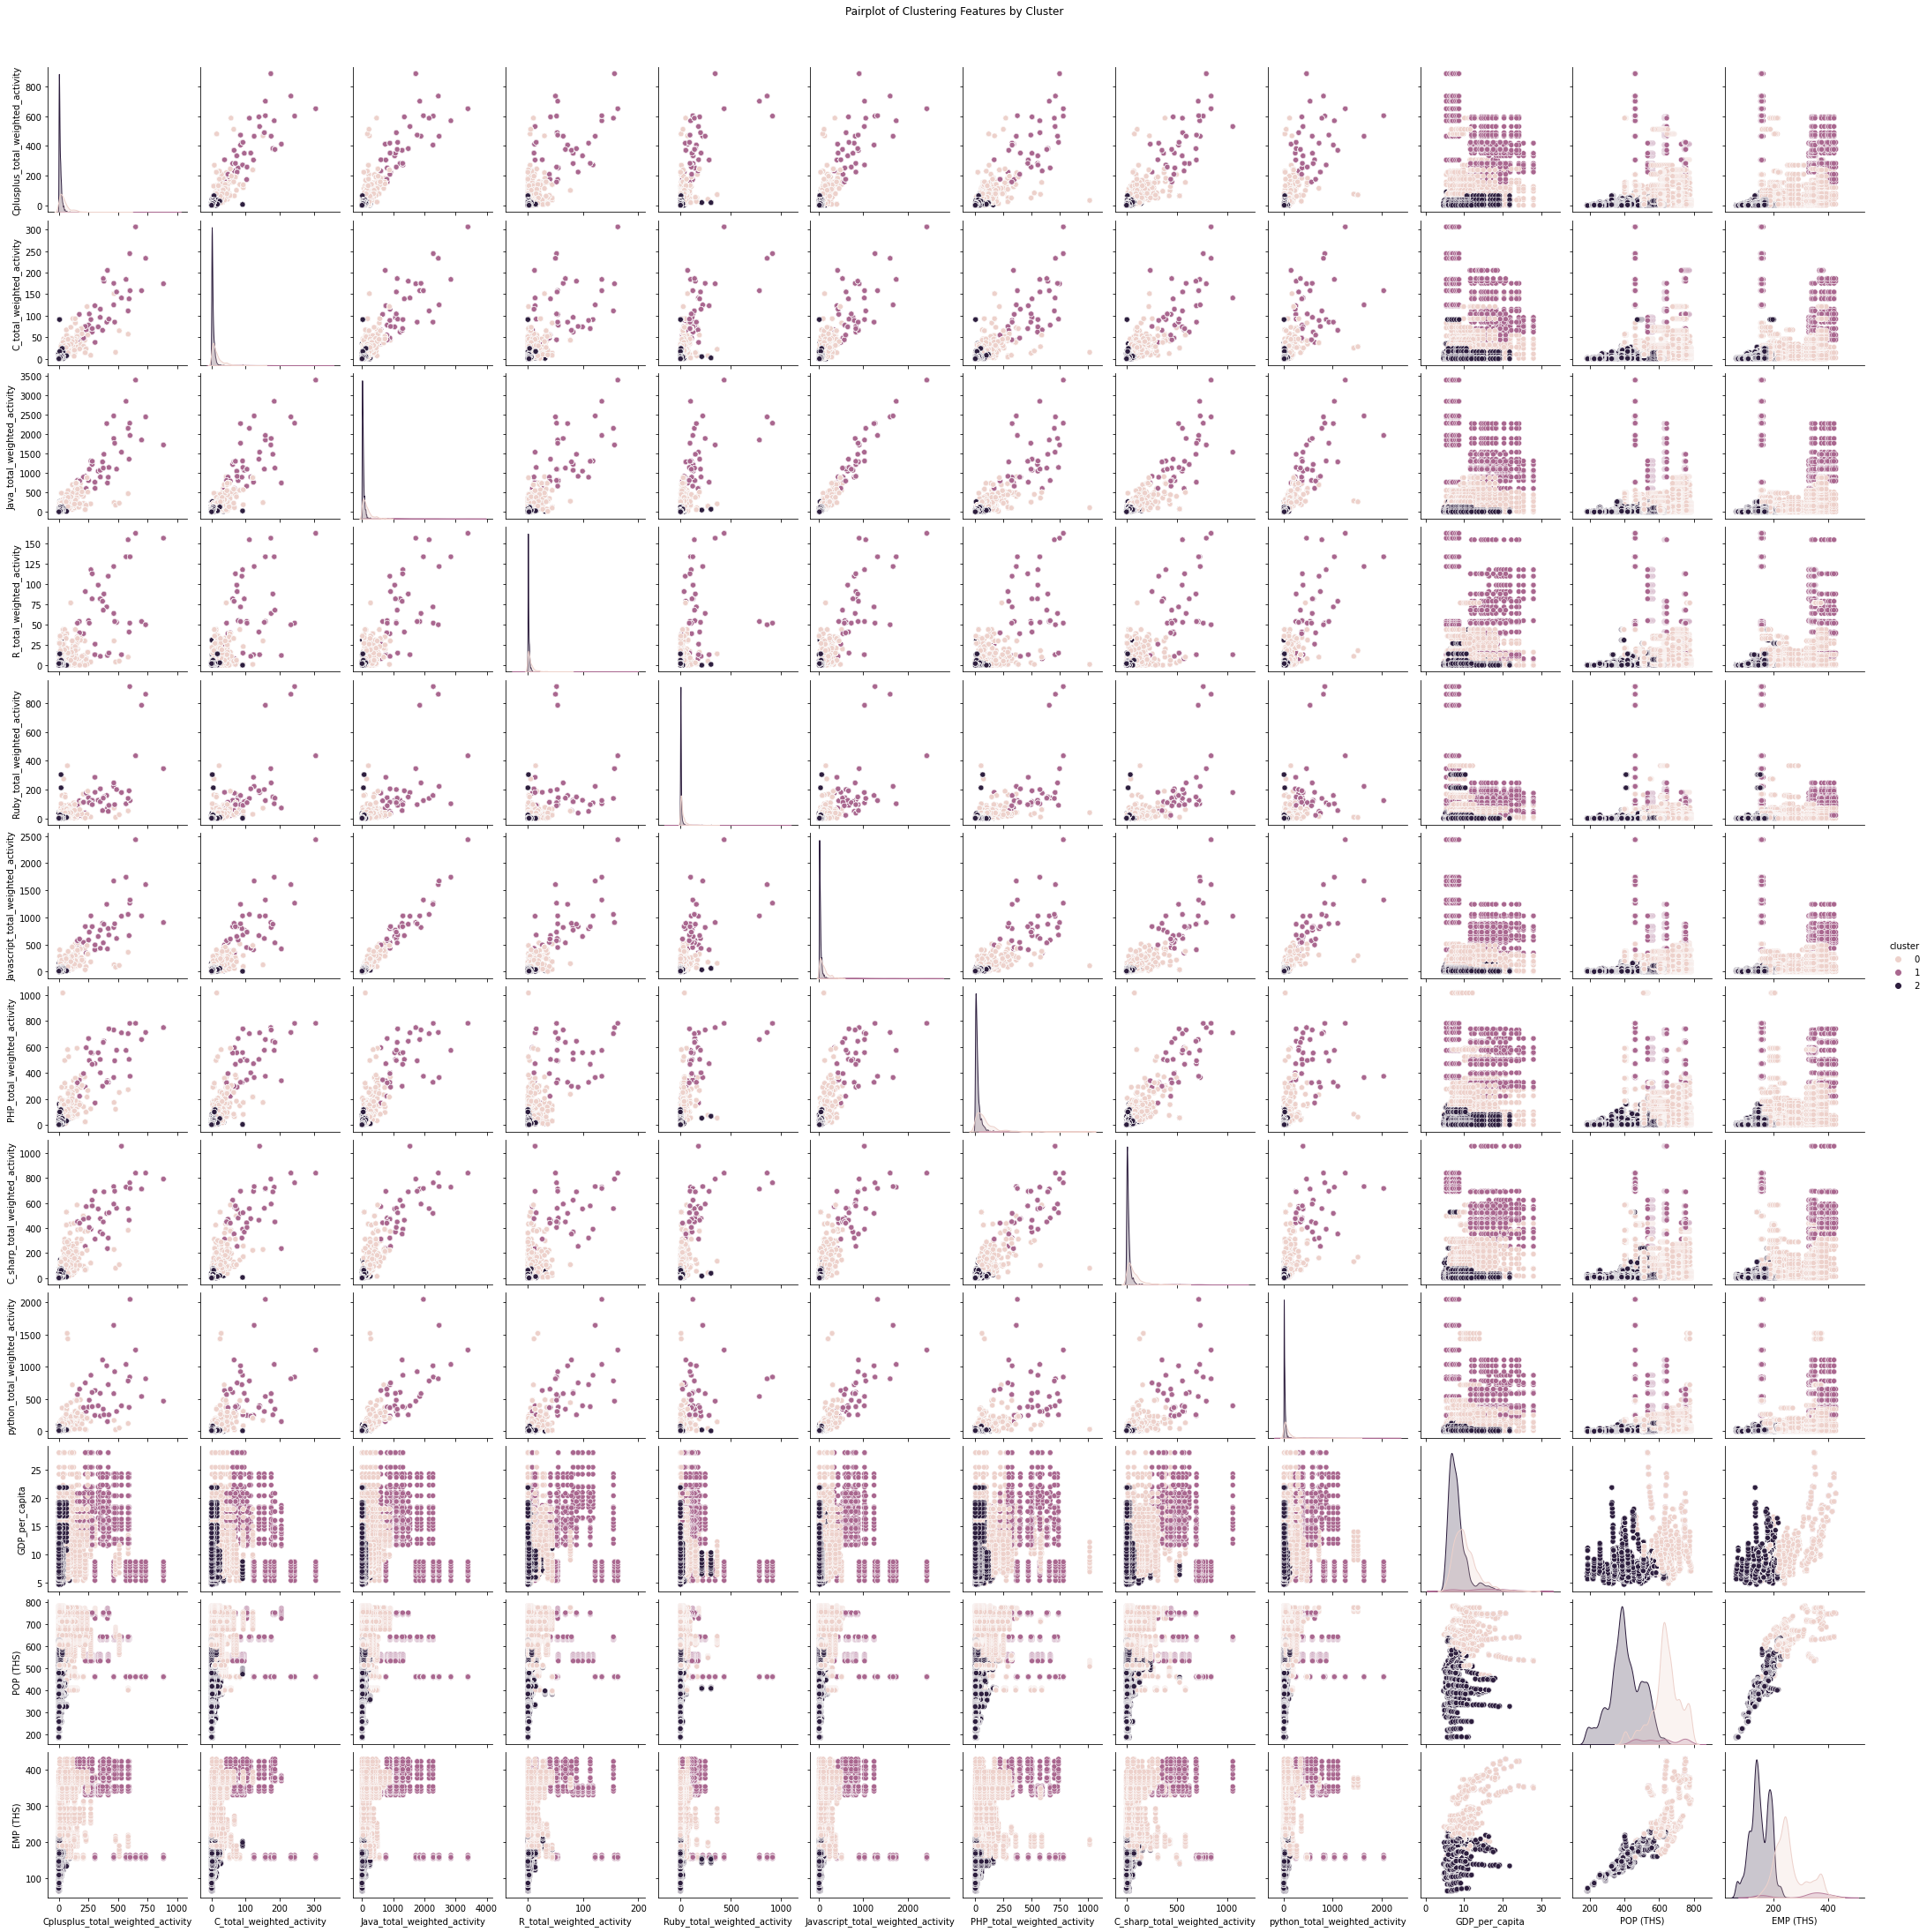

In [350]:
clustering_features = [
    # Programming language activities
    'Cplusplus_total_weighted_activity', 'C_total_weighted_activity',
    'Java_total_weighted_activity', 'R_total_weighted_activity',
    'Ruby_total_weighted_activity', 'Javascript_total_weighted_activity',
    'PHP_total_weighted_activity', 'C_sharp_total_weighted_activity',
    'python_total_weighted_activity',
    # Economic indicators
    'GDP_per_capita', 'POP (THS)', 'EMP (THS)'
]

# Selecting the relevant data for clustering
data_for_clustering = filtered_data[clustering_features].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_for_clustering)

# Determine the optimal number of clusters using the elbow method
cost = []
K = range(1, 10)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, init="k-means++", n_init=5, random_state=42)
    kmeans.fit(scaled_features)
    cost.append(kmeans.inertia_)

# Plotting the elbow graph
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Determining the optimal number of clusters
optimal_num_clusters = 3
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
filtered_data['cluster'] = clusters

# Analyzing clusters to identify potential tech hubs
clustered_data = filtered_data.groupby('cluster')[clustering_features].mean()
print(clustered_data)

# Visualization
sns.pairplot(filtered_data, hue='cluster', vars=clustering_features)
plt.suptitle('Pairplot of Clustering Features by Cluster', y=1.02)
plt.show()

In [351]:
# Identify which specific NUTS3CODE regions for Clusters
cluster_0 = filtered_data[filtered_data['cluster'] == 0]['NUTS3CODE'].unique()
cluster_1 = filtered_data[filtered_data['cluster'] == 1]['NUTS3CODE'].unique()
cluster_2 = filtered_data[filtered_data['cluster'] == 2]['NUTS3CODE'].unique()

print("Regions in Cluster 1 (Established Tech Hubs):")
print(cluster_1)
print("Regions in Cluster 2 (Developing Tech Regions):")
print(cluster_2)

Regions in Cluster 1 (Established Tech Hubs):
['PL217' 'PL22A' 'PL415' 'PL514' 'PL633']
Regions in Cluster 2 (Developing Tech Regions):
['PL217' 'PL218' 'PL219' 'PL21A' 'PL224' 'PL227' 'PL228' 'PL229' 'PL22C'
 'PL411' 'PL417' 'PL424' 'PL426' 'PL427' 'PL428' 'PL431' 'PL515' 'PL516'
 'PL518' 'PL523' 'PL616' 'PL617' 'PL618' 'PL619' 'PL621' 'PL623' 'PL634'
 'PL636' 'PL637' 'PL638' 'PL712' 'PL713' 'PL714' 'PL715' 'PL722' 'PL811'
 'PL812' 'PL815' 'PL821' 'PL822' 'PL824' 'PL841' 'PL842' 'PL843' 'PL912'
 'PL921' 'PL922' 'PL923' 'PL924' 'PL925' 'PL926']


In [352]:
import statsmodels.api as sm

clusters = filtered_data['cluster'].unique()

clustered_regression_results2 = {}

for cluster in clusters:
    cluster_data = filtered_data[filtered_data['cluster'] == cluster]
    
    X = cluster_data[independent_vars] 
    y = cluster_data['GDP_per_capita']

    X = sm.add_constant(X)  
    model = sm.OLS(y, X).fit()
    clustered_regression_results2[cluster] = model

    print(f"Cluster {cluster} Regression Summary:")
    print(model.summary())
    print("\n")

Cluster 0 Regression Summary:
                            OLS Regression Results                            
Dep. Variable:         GDP_per_capita   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     94.51
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          2.65e-164
Time:                        13:46:07   Log-Likelihood:                -13554.
No. Observations:                5397   AIC:                         2.713e+04
Df Residuals:                    5387   BIC:                         2.719e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

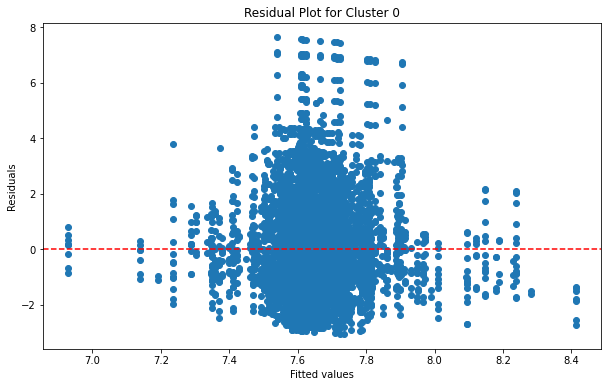

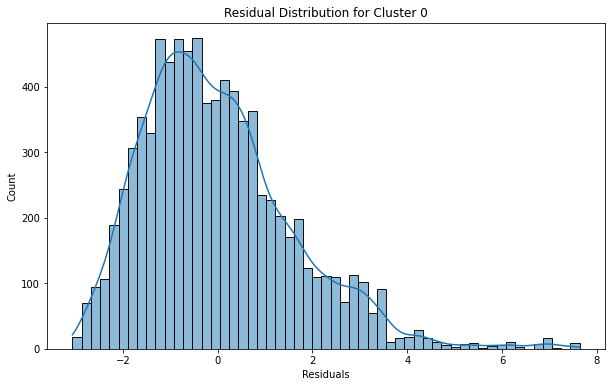

Shapiro-Wilk Test for Cluster 0: Statistic = 0.9492765665054321, p-value = 0.0
Breusch-Pagan Test for Cluster 0: Statistic = 34769.41880866012, p-value = 0.0




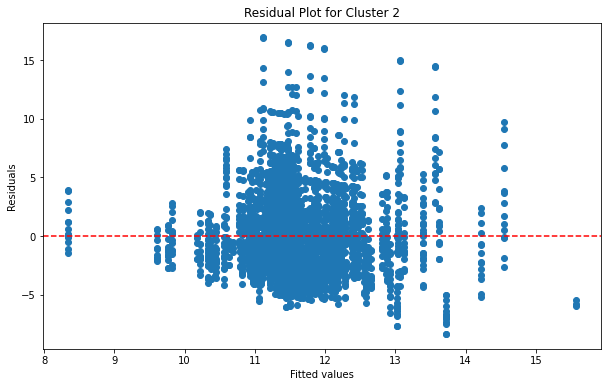

Shapiro-Wilk Test for Cluster 2: Statistic = 0.931888997554779, p-value = 9.315832190831384e-42
Breusch-Pagan Test for Cluster 2: Statistic = 8932.869130404797, p-value = 0.0




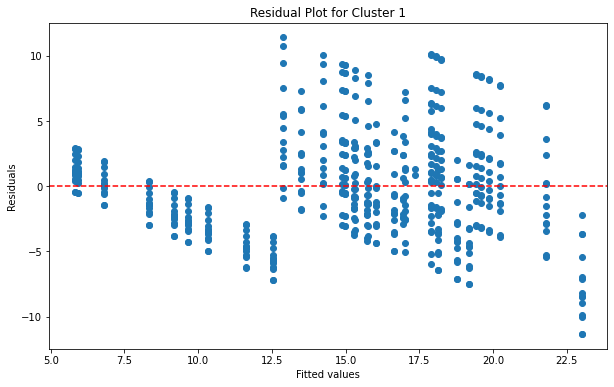

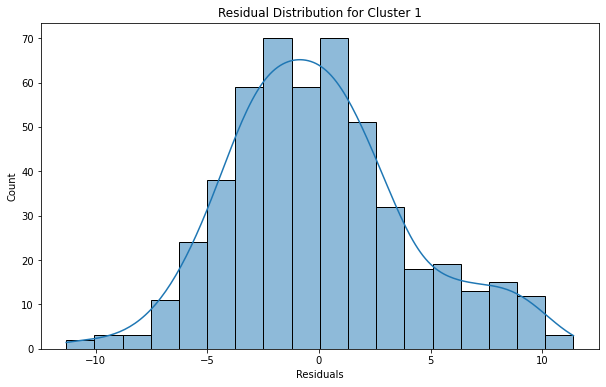

Shapiro-Wilk Test for Cluster 1: Statistic = 0.9815143942832947, p-value = 5.350619630917208e-06
Breusch-Pagan Test for Cluster 1: Statistic = 2.4562138631745802, p-value = 0.11706064310790933




In [345]:
analyze_residuals_for_all_clusters(clustered_regression_results2)

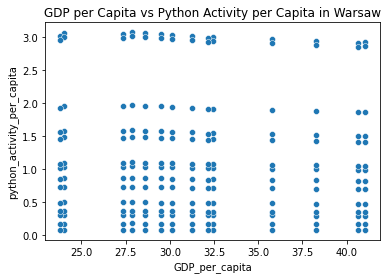

                            GDP_per_capita  python_activity_per_capita
GDP_per_capita                    1.000000                   -0.019436
python_activity_per_capita       -0.019436                    1.000000


In [335]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warsaw_data = final_data[final_data['NUTS3CODE'] == 'PL911']

# Calculate total programming activity 
warsaw_data['total_python_activity'] = warsaw_data['dpythonquestioncount'] + warsaw_data['dpythonanswercount']

# Normalize programming activity per capita 
warsaw_data['python_activity_per_capita'] = warsaw_data['total_python_activity'] / warsaw_data['POP (THS)']

# Visualize the relationship between GDP per capita and programming activity
sns.scatterplot(x='GDP_per_capita', y='python_activity_per_capita', data=warsaw_data)
plt.title('GDP per Capita vs Python Activity per Capita in Warsaw')
plt.show()

# Perform correlation analysis
correlation = warsaw_data[['GDP_per_capita', 'python_activity_per_capita']].corr()
print(correlation)

### Clusterming Model 3 with 4 programming languages and GDP per capita

         python_total_weighted_activity  Cplusplus_total_weighted_activity  \
cluster                                                                      
0                             33.646761                          24.101531   
1                           2545.529412                        1106.235294   
2                            532.834659                         337.435227   

         PHP_total_weighted_activity  C_sharp_total_weighted_activity  \
cluster                                                                 
0                          40.116058                        37.448567   
1                        1591.823529                      1808.500000   
2                         451.280682                       464.934091   

         GDP_per_capita  
cluster                  
0              8.922649  
1             31.882446  
2             16.202416  


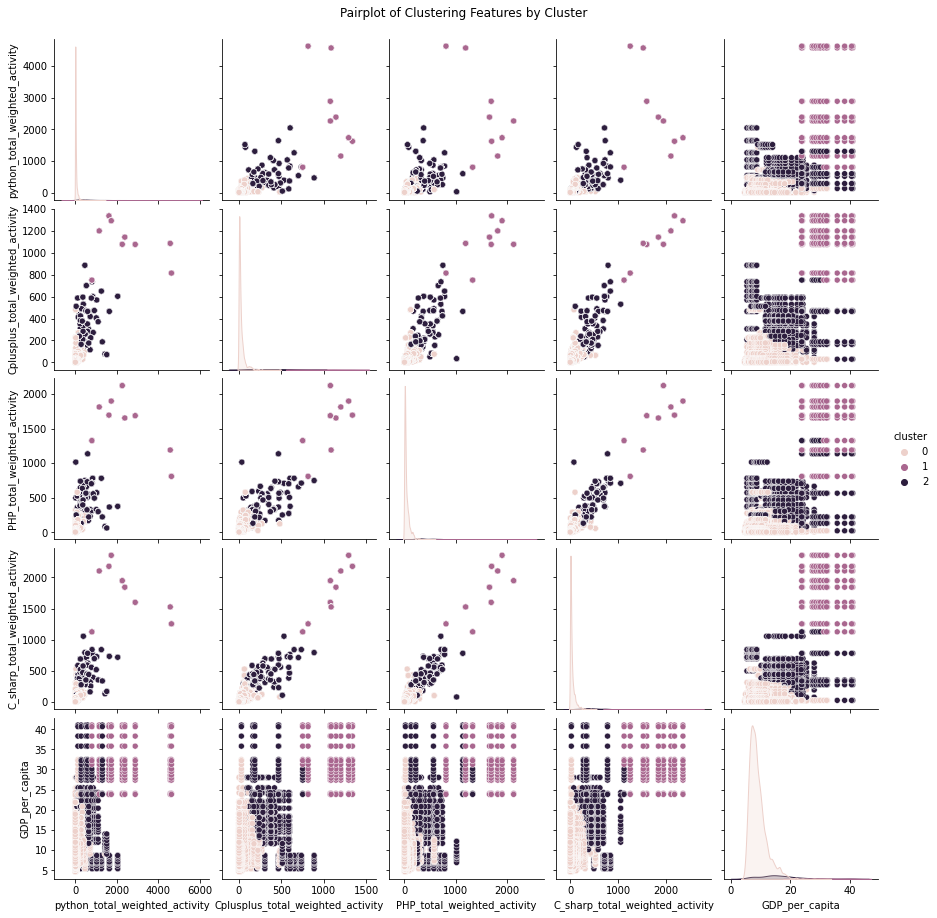

In [336]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

significant_languages = ['python_total_weighted_activity', 
                         'Cplusplus_total_weighted_activity', 
                         'PHP_total_weighted_activity', 
                         'C_sharp_total_weighted_activity']

# Prepare the data with relevant features for tech hub identification
clustering_features = significant_languages + ['GDP_per_capita']

# Select data for clustering
data_for_clustering = final_data[clustering_features].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_for_clustering)

# Determine the optimal number of clusters using the elbow method
cost = []
K = range(1, 10)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, init="k-means++", n_init=5, random_state=42)
    kmeans.fit(scaled_features)
    cost.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Choose the optimal number of clusters based on the elbow method
optimal_num_clusters = 3

# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
final_data['cluster'] = clusters

# Analyze clusters
clustered_data = final_data.groupby('cluster')[clustering_features].mean()
print(clustered_data)

# Visualization
sns.pairplot(final_data, hue='cluster', vars=clustering_features)
plt.suptitle('Pairplot of Clustering Features by Cluster', y=1.02)
plt.show()


In [337]:
# Identify which specific NUTS3CODE regions belong to Clusters
cluster_0 = final_data[final_data['cluster'] == 0]['NUTS3CODE'].unique()
cluster_1 = final_data[final_data['cluster'] == 1]['NUTS3CODE'].unique()
cluster_2 = final_data[final_data['cluster'] == 2]['NUTS3CODE'].unique()

print("Regions in Cluster 1 (Established Tech Hubs):")
print(cluster_1)
print("Regions in Cluster 2 (Developing Tech Regions):")
print(cluster_2)

Regions in Cluster 1 (Established Tech Hubs):
['PL911']
Regions in Cluster 2 (Developing Tech Regions):
['PL217' 'PL224' 'PL22A' 'PL415' 'PL424' 'PL514' 'PL613' 'PL633' 'PL711'
 'PL911' 'PL912']


#### Calculating regression for each cluster

In [346]:
import statsmodels.api as sm

clusters = final_data['cluster'].unique()

clustered_regression_results3 = {}

for cluster in clusters:
    cluster_data = final_data[final_data['cluster'] == cluster]
    
    X = cluster_data[independent_vars] 
    y = cluster_data['GDP_per_capita']

    X = sm.add_constant(X)  
    model = sm.OLS(y, X).fit()
    clustered_regression_results3[cluster] = model

    print(f"Cluster {cluster} Regression Summary:")
    print(model.summary())
    print("\n")

Cluster 0 Regression Summary:
                            OLS Regression Results                            
Dep. Variable:         GDP_per_capita   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:48:42   Log-Likelihood:                -30755.
No. Observations:               12735   AIC:                         6.153e+04
Df Residuals:                   12725   BIC:                         6.160e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### Analysis of residuals per each cluster with Clustering Model 3

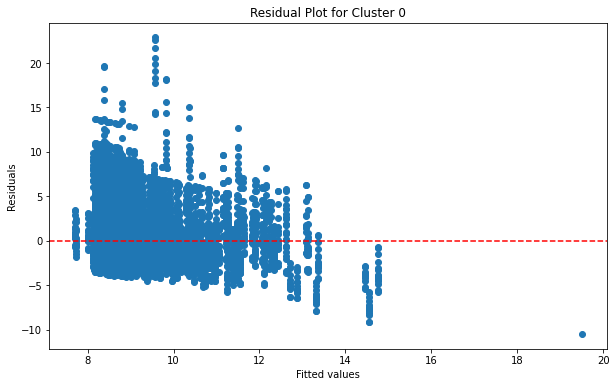

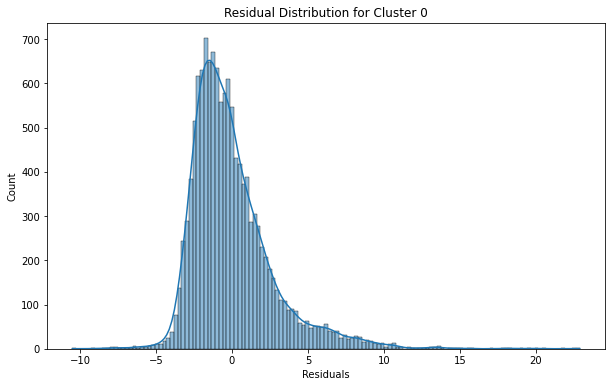

Shapiro-Wilk Test for Cluster 0: Statistic = 0.8812691569328308, p-value = 0.0
Breusch-Pagan Test for Cluster 0: Statistic = 11557.204160470532, p-value = 0.0




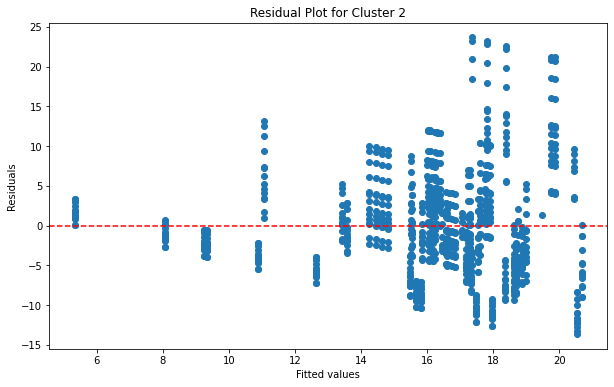

Shapiro-Wilk Test for Cluster 2: Statistic = 0.9658024907112122, p-value = 1.6817585735476315e-13
Breusch-Pagan Test for Cluster 2: Statistic = 504.40740959762485, p-value = 1.0447569041700266e-111




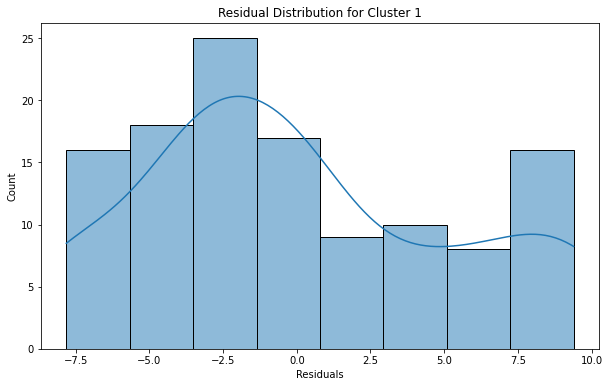

Shapiro-Wilk Test for Cluster 1: Statistic = 0.9250659942626953, p-value = 5.210349627304822e-06
Breusch-Pagan Test for Cluster 1: Statistic = 232.66810259372767, p-value = 1.5613064780402512e-52




In [347]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, bartlett

# Function to plot residuals for all clusters and conduct statistical tests
def analyze_residuals_for_all_clusters(clustered_regression_results):
    for cluster_number, model in clustered_regression_results.items():
        # Calculate residuals
        residuals = model.resid

        # Plotting residuals
        plt.figure(figsize=(10,6))
        plt.scatter(model.fittedvalues, residuals)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Fitted values')
        plt.ylabel('Residuals')
        plt.title(f'Residual Plot for Cluster {cluster_number}')
        plt.show()

        # Plotting the distribution of residuals
        plt.figure(figsize=(10,6))
        sns.histplot(residuals, kde=True)
        plt.xlabel('Residuals')
        plt.title(f'Residual Distribution for Cluster {cluster_number}')
        plt.show()

        # Shapiro-Wilk test for normality
        shapiro_test = shapiro(residuals)
        print(f"Shapiro-Wilk Test for Cluster {cluster_number}: Statistic = {shapiro_test[0]}, p-value = {shapiro_test[1]}")

        # Breusch-Pagan test for homoscedasticity
        bp_test = bartlett(model.fittedvalues, residuals)
        print(f"Breusch-Pagan Test for Cluster {cluster_number}: Statistic = {bp_test[0]}, p-value = {bp_test[1]}")
        print("\n")

# Call the function
analyze_residuals_for_all_clusters(clustered_regression_results3)

In [349]:
import statsmodels.api as sm

clusters = final_data['cluster'].unique()

clustered_regression_results3 = {}

for cluster in clusters:
    cluster_data = final_data[final_data['cluster'] == cluster]
    
    X = cluster_data[independent_vars] 
    y = cluster_data['GDP_per_capita']

    X = sm.add_constant(X)  
    model = sm.OLS(y, X).fit()
    clustered_regression_results3[cluster] = model

    print(f"Cluster {cluster} Regression Summary:")
    print(model.summary())
    print("\n")

Cluster 0 Regression Summary:
                            OLS Regression Results                            
Dep. Variable:         GDP_per_capita   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     181.6
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:17:35   Log-Likelihood:                -30755.
No. Observations:               12735   AIC:                         6.153e+04
Df Residuals:                   12725   BIC:                         6.160e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Checking the GDP per capita per each Cluster, how they are distributed

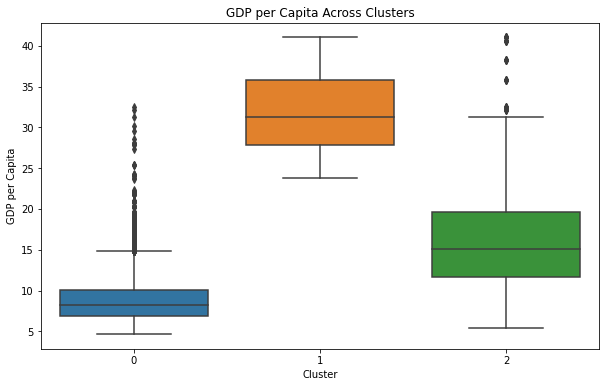

In [287]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='GDP_per_capita', data=final_data)
plt.title('GDP per Capita Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('GDP per Capita')
plt.show()

### Interpreation of Clustering models and initial OLS regression 

#### Overal fit ####
- Individual Programming Languages Model: The R-squared value of 0.430 suggests a moderate level of explanatory power when considering programming languages as predictors for GDP per capita. This means the model can explain a significant, but not complete, portion of the variation in GDP per capita.
- Clustering Models: The R-squared values in the clustering models varied significantly, with some clusters showing much lower explanatory power (as low as 0.000 in one of the clusters) and others demonstrating higher explanatory power (up to 0.535 in one of the clusters).

#### Across models ####
- The OLS regression model with individual programming languages provides a more consistent measure of the relationship between programming activities and GDP per capita across the entire dataset.
- In contrast, the clustering models, which segment the data into different groups, show that this relationship can vary greatly depending on the specific cluster or region being analyzed.

#### Influence of Warsaw region (PL911) ####
- In the clustering models, the inclusion or exclusion of Warsaw had a noticeable impact on model performance, indicating the city's unique economic profile.


#### In conclusion, while the OLS regression model with programming languages as predictors offers a moderate level of explanatory power overall, the clustering models reveal that the strength of this relationship can vary significantly across different regions. 

### Understand the results by plotting some factors on NUTS2 level for Top regions till 2022

In [359]:
nuts_2 = pd.read_excel('all_factors_nuts2.xlsx')
nuts_2

Unnamed: 0      Kod                Nazwa  TIME_PERIOD  \
0             0        0               POLSKA         2022   
1             1   200000         DOLNOŚLĄSKIE         2022   
2             2   400000   KUJAWSKO-POMORSKIE         2022   
3             3   600000            LUBELSKIE         2022   
4             4   800000             LUBUSKIE         2022   
..          ...      ...                  ...          ...   
250         250  2400000              ŚLĄSKIE         2008   
251         251  2600000       ŚWIĘTOKRZYSKIE         2008   
252         252  2800000  WARMIŃSKO-MAZURSKIE         2008   
253         253  3000000        WIELKOPOLSKIE         2008   
254         254  3200000   ZACHODNIOPOMORSKIE         2008   

    Sites of Worky [tys. places]  Uni_tech graduates[person.]  \
0                          534,8                          NaN   
1                           40,0                          NaN   
2                           21,3                          NaN   
3                           19,5                          NaN   
4                           11,9                          NaN   
..                           ...                          ...   
250                         68,9                      10790.0   
251                          7,2                       1225.0   
252                         15,1                          NaN   
253                         51,7                       3895.0   
254                         16,3                       3522.0   

     Women - Uni_tech graduates [person.]  
0                                     NaN  
1                                     NaN  
2                                     NaN  
3                                     NaN  
4                                     NaN  
..                                    ...  
250                                4482.0  
251                                 363.0  
252                                   NaN  
253                                1100.0  
254                                1490.0  

[255 rows x 7 columns]

In [276]:
# Filter the dataframe to find NaNs rows
nan_rows = nuts_2[nuts_2['Women - Uni_tech graduates [person.]'].isna()]

nan_rows['TIME_PERIOD'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008])

In [360]:
# Convert 'Sites of Worky [tys. places]' to a numeric value (assuming it's a string with commas)
nuts_2['Sites_of_Worky'] = pd.to_numeric(nuts_2['Sites of Worky [tys. places]'].str.replace(',', '.'))

# Plotting
plt.figure(figsize=(12, 6))

# Plot each 'Kod' as a separate line
for kod in nuts_2['Nazwa'].unique():
    kod_data = nuts_2[nuts_2['Nazwa'] == kod]
    plt.plot(kod_data['TIME_PERIOD'], kod_data['Sites_of_Worky'], label=kod, marker='o')

plt.xlabel('Time Period')
plt.ylabel('Sites of Work [tys. places]')
plt.title('Sites of Work Over Time by Kod')
plt.legend(title="Kod")
plt.grid(True)
plt.show()

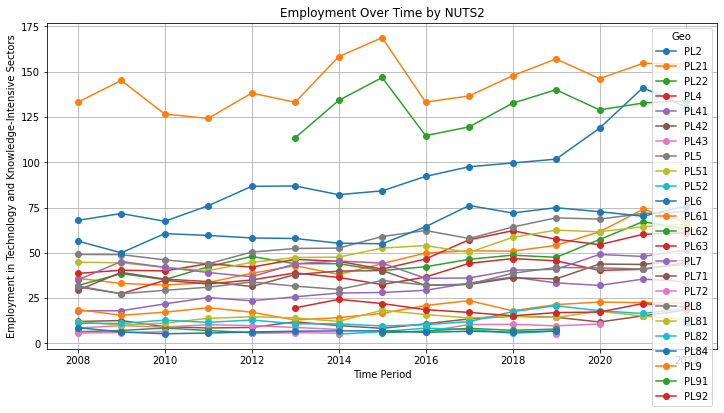

In [278]:
empl_in_tech = pd.read_excel('Employment_technology_knowledge_intensive_sectors.xlsx')

plt.figure(figsize=(12, 6))

# Plot each 'geo' as a separate line
for geo in empl_in_tech['geo'].unique():
    geo_data = empl_in_tech[empl_in_tech['geo'] == geo]
    plt.plot(geo_data['TIME_PERIOD'], geo_data['OBS_VALUE'], label=geo, marker='o')

plt.xlabel('Time Period')
plt.ylabel('Employment in Technology and Knowledge-Intensive Sectors')
plt.title('Employment Over Time by NUTS2')
plt.legend(title="Geo")
plt.grid(True)
plt.show()

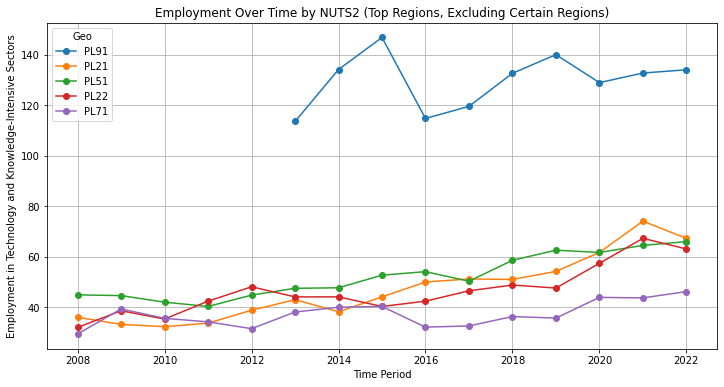

In [363]:
# Visualize for top regions 
nuts_2['Sites_of_Worky'] = pd.to_numeric(nuts_2['Sites of Worky [tys. places]'].str.replace(',', '.'))

# Get the top regions based on the latest available 'Sites_of_Worky' value
top_regions_sites = nuts_2.groupby('Nazwa')['Sites_of_Worky'].last().nlargest(5).index

plt.figure(figsize=(12, 6))

# Plot only the top regions
for kod in top_regions_sites:
    kod_data = nuts_2[nuts_2['Nazwa'] == kod]
    plt.plot(kod_data['TIME_PERIOD'], kod_data['Sites_of_Worky'], label=kod, marker='o')

plt.xlabel('Time Period')
plt.ylabel('Sites of Work [tys. places]')
plt.title('Sites of Work Over Time by Kod (Top Regions)')
plt.legend(title="Kod")
plt.grid(True)
plt.show()

top_regions_empl = empl_in_tech[empl_in_tech['geo'].str.contains('PL[^1]\d')].groupby('geo')['OBS_VALUE'].last().nlargest(5).index

plt.figure(figsize=(12, 6))

# Plot only the top regions, excluding the ones with '1' after 'PL'
for geo in top_regions_empl:
    geo_data = empl_in_tech[empl_in_tech['geo'] == geo]
    plt.plot(geo_data['TIME_PERIOD'], geo_data['OBS_VALUE'], label=geo, marker='o')

plt.xlabel('Time Period')
plt.ylabel('Employment in Technology and Knowledge-Intensive Sectors')
plt.title('Employment Over Time by NUTS2 (Top Regions, Excluding Certain Regions)')
plt.legend(title="Geo")
plt.grid(True)
plt.show()


#### Sites of Work Over Time by Kod (Top Regions)

The national aggregate, shows a significant peak around 2012, remains high until about 2018, and then declines, possibly due to economic changes or shifts in the distribution of work sites.
MAZOWIECKIE follows the national trend to some extent but with less volatility, suggesting it may contribute substantially to the national aggregate.
ŚLĄSKIE, WIELKOPOLSKIE, and DOLNOŚLĄSKIE show relative stability over time with some minor fluctuations, indicating that the number of sites of work in these regions has not changed dramatically.
The consistent level of sites of work in the latter three regions suggests either a steady state in the regional economies or successful adaptation to external economic forces.

#### Employment Over Time by NUTS2 (Top Regions) 

PL91 (Warsaw region) shows a clear and consistent upward trend in employment over time, indicating robust growth in the technology and knowledge-intensive sectors within this region.
"PL22 (Slask) also indicates growth, though there are some fluctuations. Notably, there is a sharp increase in employment after 2014, peaking around 2016, and then it stabilizes with slight declines towards 2022.
PL21 (Malopolskie) and PL51 (Dolnoslaskie) demonstrate moderate growth, with "PL21" slightly outpacing "PL51" in the later years. Both regions show a gradual increase in employment, suggesting steady development in these sectors.
PL71 (Lodz) remains relatively stable with a slight increase towards the end of the period. The stability suggests a mature sector that maintains its workforce over time.